<a href="https://colab.research.google.com/github/pankajalwr/advance-python/blob/main/Outilers_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/titanic.csv")

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df['Age'].describe()

,Age
count,332.000000
mean,30.272590
std,14.181209
min,0.170000
25%,21.000000
50%,27.000000
75%,39.000000
max,76.000000


<Axes: ylabel='Age'>

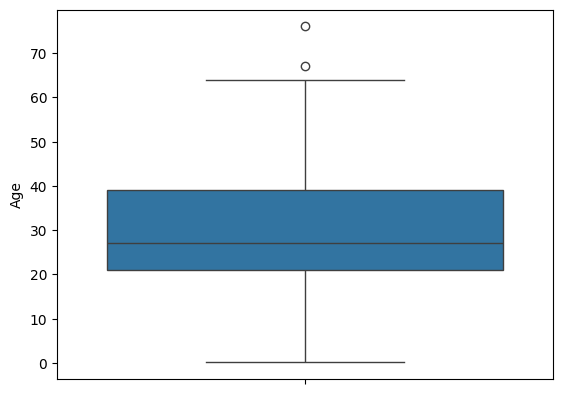

In [8]:
sns.boxplot(df['Age'])

In [9]:
#finding the IQR(inter quantile range)

percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)

In [10]:
percentile75

np.float64(39.0)

In [11]:
percentile25

np.float64(21.0)

In [12]:
IQR = percentile75 - percentile25
IQR

np.float64(18.0)

In [14]:
upper_limit = percentile75 + 1.5*IQR
upper_limit


np.float64(66.0)

In [15]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

np.float64(-6.0)

In [16]:
#find outliers

In [18]:
df[df['Age']>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [19]:
df[df['Age']< lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [20]:
# trimming


In [21]:
newdf = df[df['Age']<upper_limit]

In [22]:
newdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


In [23]:
#comparision

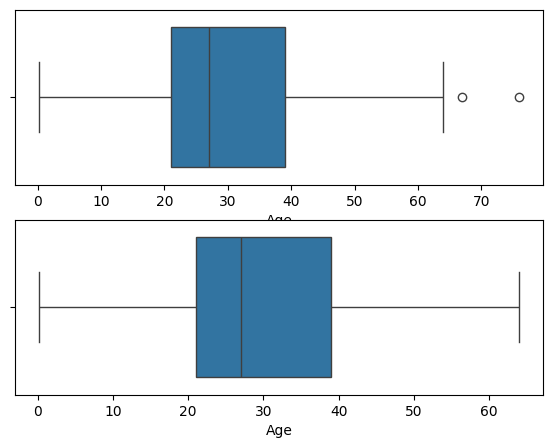

In [24]:
plt.figure(figsize = (15,5))

plt.subplot(222)
sns.boxplot(x = df['Age'])

plt.subplot(224)
sns.boxplot(x = newdf['Age'])
plt.show()

In [25]:
#capping

In [26]:
new_df_cap = df.copy()

In [27]:
new_df_cap['Age'] = np.where(
    new_df_cap['Age']>upper_limit,
    upper_limit,

    np.where(
        new_df_cap['Age']< lower_limit,
        lower_limit ,
        new_df_cap['Age'])
)

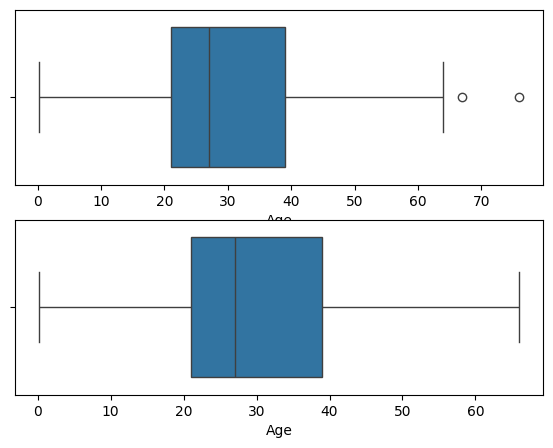

In [28]:
plt.figure(figsize = (15,5))

plt.subplot(222)
sns.boxplot(x = df['Age'])

plt.subplot(224)
sns.boxplot(x = new_df_cap['Age'])
plt.show()